# Import the required libraries
1.tensorflow - image processing
2.gradio - to quickly a customizable UI components for your ML model
3.matplotlib - visualization
4.numpy - numerical python

In [90]:
import tensorflow as tf
import gradio as gr
from matplotlib import pyplot as plt
import numpy as np

In [73]:
#mnist dataset is available in tensorflow itself
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

finding shape

In [77]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [76]:
#how one image looks like
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

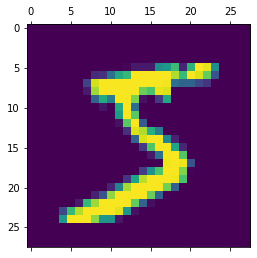

In [79]:
#maplotlib function which helps to display the image of the array of numbers
plt.matshow(X_train[0])

In [80]:
#crosscheck
y_train[0]

5

The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. so divide by 255

In [74]:
x_train = x_train / 255.0, 
x_test = x_test / 255.0

Define the architecture of our model, which consists of a single hidden layer with 128 neurons.

In [89]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [87]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [88]:
#Fit the model.
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=6)

Epoch 1/6
1875/1875 [==============================] - 27s 11ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0734 - val_accuracy: 0.9790
Epoch 2/6
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0218 - accuracy: 0.9938 - val_loss: 0.0780 - val_accuracy: 0.9774
Epoch 3/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.0833 - val_accuracy: 0.9765
Epoch 4/6
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0799 - val_accuracy: 0.9791
Epoch 5/6
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.0790 - val_accuracy: 0.9796
Epoch 6/6
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0861 - val_accuracy: 0.9773


# With the final line,the model has been trained to roughly 97% accuracy on the validation dataset.

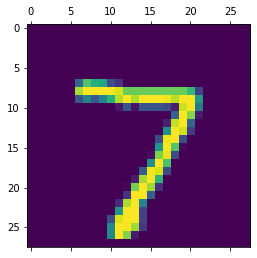

In [91]:
plt.matshow(X_test[0])

In [96]:
#np.argmax finds a maximum element from an array and returns the index of it
prediction = model.predict(X_test)
print(np.argmax(prediction[0]))

7


The gradio library requires  to define 3 things: a prediction function, an input UI component, and an output UI component

Sketchpad - input,  the Label component - output

In [81]:
def classify(input):
    prediction = model.predict(input.reshape(1, 28, 28)).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

label = gr.outputs.Label(num_top_classes=3)
interface = gr.Interface(fn=classify, inputs="sketchpad", outputs=label, 
live=True)
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7870/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x23562a17670>,
 'http://127.0.0.1:7870/',
 None)

###### The data is 3dimensional.

6000 -> number of records/images, first dimension

28 * 28 -> shape of each image, second and third dimension

In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [67]:
#2. Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
#3. Fitting the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=6)

Epoch 1/6


ValueError: in user code:

    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 784), found shape=(32, 28, 28)


In [42]:
#4. Evaluate the model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.1377 - accuracy: 0.8860


[6.137679100036621, 0.8859999775886536]

In [43]:
#5. Prediction
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([4.8014753e-24, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       6.1400357e-08, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [44]:
#np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])

3

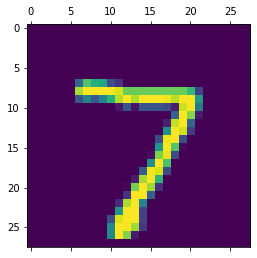

In [45]:
#check
plt.matshow(X_test[0])

In [47]:
def classify(input):
    prediction = model.predict(input.reshape(1, 28, 28)).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

label = gr.outputs.Label(num_top_classes=3)
interface = gr.Interface(fn=classify, inputs="sketchpad", outputs=label, 
live=True)
interface.launch()

Running on local URL:  http://127.0.0.1:7869/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x23562a17670>,
 'http://127.0.0.1:7869/',
 None)

Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\gradio\routes.py", line 265, in predict
    output = await run_in_threadpool(app.launchable.process_api, body, username)
  File "C:\Users\HP\anaconda3\lib\site-packages\starlette\concurrency.py", line 39, in run_in_threadpool
    return await anyio.to_thread.run_sync(func, *args)
  File "C:\Users\HP\anaconda3\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "C:\Users\HP\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "C:\Users\HP\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 754, in run
    result = context.run(func, *args)
  File "C:\Users\HP\anaconda3\lib\site-packages\gradio\interface.py", line 573, in process_api
    prediction, durations = self.process(raw_input)
  File "C:\Users\HP\anaconda3